In [1]:
# Jacob Morrissey HW9 8/27/21

## Problem 1

In [2]:
print('Problem 1:')
import numpy as np
import matplotlib.pyplot as plt

Problem 1:


## Problem 2

In [3]:
# part a
sports = [1500, 40000, 10000]
athletes_times = [(1, 1.204, 6.6, 0.32), (2, 1.212, 6.5, 0.36), (3, 1.14, 6.6, 0.38), (4, 1.12, 6.2, 0.38), (5, 1.24, 5.6, 0.4), (6, 1.201, 6.0, 0.3)]
sports = np.asarray(sports)
athletes_times = np.asarray(athletes_times)

In [4]:
# part b
def triatholon_time(sports, athletes_times):
    """Input: array of race distances (swimming, biking, running) and array of participants' ID's and average speeds (ID, swimming, biking, running) \n Output: IDs of the participants who will finish first and last and their respective times."""
    times = []
    for i in athletes_times:
        tot_time = 0
        for j in range( len(i) - 1):
            tot_time += ( sports[j] / i[j + 1] ) / 3600
        times.append(tot_time)
    first =[times.index(min(times)) + 1, min(times)]
    last =[times.index(max(times)) + 1, max(times)]
    print('Participant', first[0], 'will finish first after ', "%.2f" % first[1], ' hours.')
    print('Participant', last[0], 'will finish last after ', "%.2f" % last[1], ' hours.')

In [5]:
# part c
sports_dict = {'swimming' : 1500, 'biking' : 40000, 'running' : 10000}
names = ['Mary', 'John', 'Peter', 'Mafalda', 'Paul', 'Lionel']
speeds = [(1.204, 6.6, 0.32), (1.212, 6.5, 0.36), (1.14, 6.6, 0.38), (1.12, 6.2, 0.38), (1.24, 5.6, 0.4), (1.201, 6.0, 0.3)]
athletes_times_dict = {}
for i in range(len(names)):
    athletes_times_dict[ names[i] ] = speeds[i]

In [6]:
 # part d
def triathalon_time_dict(sports_dict, athletes_times_dict):
    """Input: dictionary of race distances (sport : distance) and dictionary of participants' names and average speeds (name : swimming, biking, running) \n Output: names of the participants who will finish first and last and their respective times."""
    times = []
    results = {}
    sports_keys = []
    for s in sports_dict:
        sports_keys.append(s)
    names = []
    for n in athletes_times_dict:
        names.append(n)
    for i in athletes_times_dict:
        tot_time = 0
        for j in range( len(athletes_times_dict[i]) ):
            tot_time += ( sports_dict[ sports_keys[j] ] / athletes_times_dict[i][j] ) / 3600
        times.append(tot_time)
    first = [ names[ times.index( min(times) ) ], min(times) ]
    last = [ names[ times.index( max(times) ) ], max(times) ]
    print(first[0], 'will finish first after', "%.2f" % first[1], 'hours.')
    print(last[0], 'will finish last after', "%.2f" % last[1], 'hours.')

In [7]:
# part e
print('Problem 2:')
print('arrays')
triatholon_time(sports, athletes_times)
print()
print('dictionaries')
triathalon_time_dict(sports_dict, athletes_times_dict)

Problem 2:
arrays
Participant 5 will finish first after  9.26  hours.
Participant 6 will finish last after  11.46  hours.

dictionaries
Paul will finish first after 9.26 hours.
Lionel will finish last after 11.46 hours.


## Problem 3

#### CHM 3120L-0011 problem: Determine the percent of KHP by mass in a sample by titrating with NaOH
#### soution: 31.81%

Problem 3


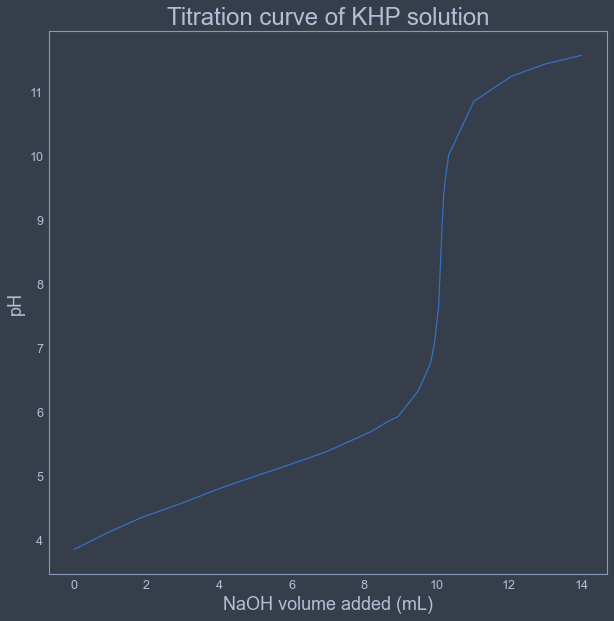

In [8]:
print('Problem 3')
initial_mark = 23.95
NaOH = 0.1035
KHP_MW = 204.22
dilution = 5
sample_mass = 3.3423
marks = np.asarray((23.95, 24.82, 25.85, 26.95, 27.99, 28.86, 29.81, 30.91, 32.01, 32.22, 32.6, 32.89, 33.43, 33.52, 33.79, 33.9, 34.01, 34.1, 34.15, 34.2, 34.29, 34.51, 34.98, 36.01, 36.93, 37.95))
pH = np.asarray((3.85, 4.1, 4.36, 4.58, 4.81, 4.98, 5.16, 5.38, 5.66, 5.72, 5.85, 5.93, 6.32, 6.42, 6.77, 7.1, 7.66, 8.86, 9.42, 9.68, 10.03, 10.29, 10.86, 11.25, 11.44, 11.58))
v_added = marks - initial_mark
plt.figure(figsize=(10,10))
plt.plot(v_added, pH)
plt.title('Titration curve of KHP solution', fontsize = 24)
plt.xlabel('NaOH volume added (mL)', fontsize = 18)
plt.ylabel('pH', fontsize = 18)
plt.show()

In [9]:
def approx_derivative(y, x):
    """Given two arrays, y and x, approximates the derivative at each point as (y[i+1] - y[i]) / (x[i+1] - x[i])."""
    import numpy as np
    first_der = np.ediff1d(y) / np.ediff1d(x)
    return first_der

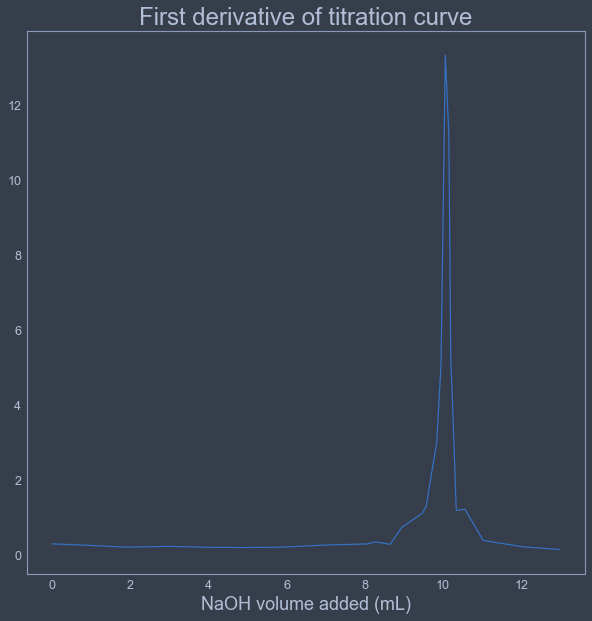

In [10]:
plt.figure(figsize=(10,10))
plt.plot(v_added[:25], approx_derivative(pH, v_added))
plt.title('First derivative of titration curve', fontsize = 24)
plt.xlabel('NaOH volume added (mL)', fontsize = 18)
plt.show()

In [11]:
end_v = v_added[ np.where( approx_derivative(pH, v_added) == np.max(approx_derivative(pH, v_added)) )[0] ]
moles = end_v * NaOH / 1000
mass = moles * KHP_MW * dilution
percent = 100 * mass / sample_mass
print("The unkown sample was" , str("%.2f" % percent) + "% KHP by mass.")

The unkown sample was 31.81% KHP by mass.


## Problem 4

In [12]:
class holiday_frenzy:
    """Represents a box with dimensions a, b, and c in inches, number of gifts with a volume of 25 cubic inches, and surface area of gift wrap available in square inches."""
    def __init__(self, a = 1, b = 1, c = 1, number_of_gifts = 1, wrap_paper_available = 1): 
        self.a = a
        self.b = b
        self.c = c
        self.number_of_gifts = number_of_gifts
        self.wrap_paper_available = wrap_paper_available
    def surface_area(box):
        s_a = 2 * ( (box.a * box.b) + (box.a * box.c) + (box.b * box.c) )
        return s_a
    def volume(box):
        return (box.a * box.b * box.c)
    def enough_paper(box):
        return box.surface_area() <= box.wrap_paper_available
    def fits(box):
        return box.volume() >= ( 25 * box.number_of_gifts )
    def print_gift(box):
        if box.enough_paper():
            paper = ''
        else:
            paper = 'do not '
        if box.fits():
            gifts = ''
        else:
            gifts = 'not'
        if box.fits() + box.enough_paper() == 1:
            conj = 'but '
        else:
            conj = 'and '
        print('You ' + paper + 'have enough wrapping paper, ' + conj + 'you can' + gifts + ' fit all your gifts in the box.')
        if box.fits() + box.enough_paper() == 0:
            print('The holidays are ruined!')

In [13]:
print('Problem 4')
box1 = holiday_frenzy(10,10,10,15,800)
box2 = holiday_frenzy(10,10,10,55,1000)
box3 = holiday_frenzy(100,20,10,55,300)
box1.print_gift()
box2.print_gift()
box3.print_gift()

Problem 4
You have enough wrapping paper, and you can fit all your gifts in the box.
You have enough wrapping paper, but you cannot fit all your gifts in the box.
You do not have enough wrapping paper, but you can fit all your gifts in the box.
